In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
trainModel=False

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [5]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

3404855

In [7]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

3404855

In [9]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [10]:
len(array_Xval)

400571

In [11]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [12]:
len(array_Yval)

400571

In [13]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [14]:
len(array_Xtest)

200316

In [15]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [16]:
len(array_Ytest)

200316

In [17]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
model_Gen=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model_Gen.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [18]:
array_Xtrain

array([[[ 0.25217391,  0.        ,  0.86956522,  0.6       ,
          0.5       ],
        [ 0.2673913 ,  0.01521739,  0.86956522,  0.6       ,
          0.5       ],
        [ 0.25652174, -0.01086957,  0.86956522,  0.6       ,
          0.5       ],
        ...,
        [ 0.36521739,  0.01086957,  0.13043478,  1.        ,
          1.        ],
        [ 0.38913043,  0.02391304,  0.13043478,  1.        ,
          1.        ],
        [ 0.3826087 , -0.00652174,  0.13043478,  1.        ,
          1.        ]],

       [[ 0.2673913 ,  0.01521739,  0.86956522,  0.6       ,
          0.5       ],
        [ 0.25652174, -0.01086957,  0.86956522,  0.6       ,
          0.5       ],
        [ 0.27608696,  0.01956522,  0.91304348,  0.8       ,
          0.5       ],
        ...,
        [ 0.38913043,  0.02391304,  0.13043478,  1.        ,
          1.        ],
        [ 0.3826087 , -0.00652174,  0.13043478,  1.        ,
          1.        ],
        [ 0.35434783, -0.02826087,  0.13043478, 

In [19]:
if(trainModel):
    history =model_Gen.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
    results = model_Gen.evaluate(array_Xtest, array_Ytest)
    print("test loss, test acc:", results)
    model_utils.modelEvaluateTraining(history)
    model_Gen.save('modelos/model_Gen_15min.h5')
    yhat = model_Gen.predict(array_Xtest)
    model_utils.plotPredicted(yhat,array_Ytest,scalerGlucosa)
    model_utils.forecast_accuracy(yhat,array_Ytest)

In [20]:
model_Gen = keras.models.load_model('modelos/model_Gen_15min.h5')

In [21]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [22]:
len(array_Xtest)

200316

In [23]:
array_Xtest

array([[[ 0.11521739,  0.00217391,  0.47826087,  0.2       ,
          0.5       ],
        [ 0.11304348, -0.00217391,  0.47826087,  0.2       ,
          0.5       ],
        [ 0.10217391, -0.01086957,  0.47826087,  0.2       ,
          0.5       ],
        ...,
        [ 0.22391304, -0.00217391,  0.73913043,  0.6       ,
          0.5       ],
        [ 0.23478261,  0.01086957,  0.7826087 ,  0.6       ,
          0.5       ],
        [ 0.24565217,  0.01086957,  0.7826087 ,  0.6       ,
          0.5       ]],

       [[ 0.11304348, -0.00217391,  0.47826087,  0.2       ,
          0.5       ],
        [ 0.10217391, -0.01086957,  0.47826087,  0.2       ,
          0.5       ],
        [ 0.09130435, -0.01086957,  0.47826087,  0.2       ,
          0.5       ],
        ...,
        [ 0.23478261,  0.01086957,  0.7826087 ,  0.6       ,
          0.5       ],
        [ 0.24565217,  0.01086957,  0.7826087 ,  0.6       ,
          0.5       ],
        [ 0.24782609,  0.00217391,  0.7826087 , 

In [24]:
len(array_Ytest)

200316

# Predicción a 30 min

In [61]:
lenHorizonte=2
horizonte=[]
horizonte_array_Ytest=[]
for i in range(lenHorizonte):
    horizonte.append(array_Xtest[i]) 
    horizonte_array_Ytest.append(array_Ytest[i]) 
horizonte=np.reshape(horizonte, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))
len(horizonte)

2

In [65]:
horizonte.shape

(2, 30, 5)

1/1 [==============================] - 0s 23ms/step


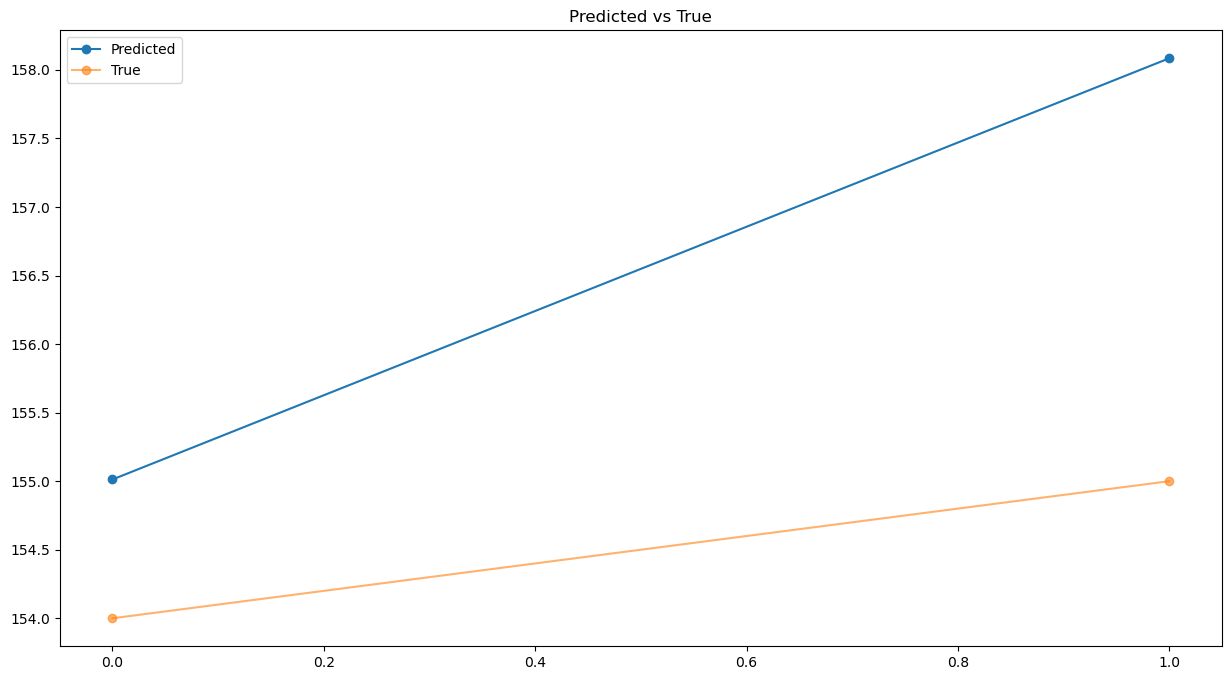

{'mae': 2.048553466796875,
 'mse': 2.2957066442048206,
 'rmse': 5.270268996246159}

In [63]:
yhat=model_utils.predictionOverPrediction(horizonte,model_Gen)

yhat = pd.DataFrame(yhat)
horizonte_array_Ytest = pd.DataFrame(horizonte_array_Ytest)

yhat = pd.DataFrame(scalerGlucosa.inverse_transform(yhat))
horizonte_array_Ytest = pd.DataFrame(scalerGlucosa.inverse_transform(horizonte_array_Ytest))

model_utils.plotPredicted(yhat,horizonte_array_Ytest)
model_utils.forecast_accuracy(yhat,horizonte_array_Ytest)